# 이웃집 토토치 파이토치 : Day 1
---

<div class="alert alert-info">
    <p>📢 해당 게시물은 파이토치 공식 튜토리얼 중 <a href="https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html">예제로 배우는 파이토치(PYTORCH) </a>와 파이토치(PYTORCH) 기본 익히기-<a href="https://tutorials.pytorch.kr/beginner/basics/tensorqs_tutorial.html">텐서(Tensor)</a>, <a href="https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html#id13">DATASET과 DATALOADER</a>, <a href="https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html">Autograd</a> 그리고 토치비전 공식문서의 Example gallery-<a href=https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py">ILLUSTRATION OF TRANSFORMS</a>를 재구성하여 작성되었습니다.</p>
</div>

#### 주요 키워드
- Tensor
- Autograd
- Dataset과 Dataloader
- Transform

#### 목차
1. 탠서(TENSOR)
    1. 텐서(tensor) 초기화
    2. 텐서의 속성(Attribute)
    3. 텐서 연산(Operation)
    4. NumPy 변환(Bridge)
    5. [실습] Numpy to Tensor
2. Autograd
    1. Tensor, Function과 연산그래프(Computational graph)
    2. 변화도(Gradient) 계산하기
    3. 변화도 추적 멈추기
    4. 연산 그래프에 대한 추가 정보
    5. 선택적으로 읽기(Optional Reading): 텐서 변화도와 야코비안 곱 (Jacobian Product)
    6. [실습] Backpropagation with Autograd
3. DATASET과 DATALOADER
    1. 데이터셋 불러오기
    2. 데이터셋을 순회하고 시각화하기
    3. 파일에서 사용자 정의 데이터셋 만들기
    4. DataLoader로 학습용 데이터 준비하기
    5. DataLoader를 통해 순회하기
4. 변형(TRANSFORM)
    1. ToTnesor()
    2. Lambda 변형(Transform)

## 1. 텐서(TENSOR) 
---

텐서(tensor)는 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조입니다.
PyTorch에서는 텐서를 사용하여 모델의 입력(input)과 출력(output), 그리고 모델의 매개변수들을 부호화(encode)합니다.

텐서는 GPU나 다른 하드웨어 가속기에서 실행할 수 있다는 점만 제외하면 [NumPy](https://numpy.org)의 ndarray와 유사합니다.
실제로 텐서와 NumPy 배열(array)은 종종 동일한 내부(underly) 메모리를 공유할 수 있어 데이터를 복수할 필요가 없습니다. ([NumPy 변환(Bridge)](https://tutorials.pytorch.kr/beginner/blitz/tensor_tutorial.html#bridge-to-np-label) 참고)
텐서는 또한 ([Autograd](autogradqs_tutorial.html)장에서 살펴볼) 자동 미분(automatic differentiation)에 최적화되어 있습니다.
ndarray에 익숙하다면 Tensor API를 바로 사용할 수 있을 것입니다. 아니라면, 아래 내용을 함께 보시죠!

In [7]:
import torch
import numpy as np

### A. 텐서(tensor) 초기화
텐서는 여러가지 방법으로 초기화할 수 있습니다. 

- Tensor From
  - list
  - numpy.array
  - tensor(ones_like, zeros_like, rand_like)
  - constant(ones_like, zeros_like, rand_like)


다음 예를 살펴보세요:

#### a. 데이터로부터 직접(directly) 생성하기
데이터로부터 직접 텐서를 생성할 수 있습니다. 데이터의 자료형(data type)은 자동으로 유추합니다.

In [8]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

#### b. NumPy 배열로부터 생성하기
텐서는 NumPy 배열로 생성할 수 있습니다. (그 반대도 가능합니다 - [NumPy 변환(Bridge)](https://tutorials.pytorch.kr/beginner/blitz/tensor_tutorial.html#bridge-to-np-label) 참고)

In [9]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

#### c. 다른 텐서로부터 생성하기
명시적으로 재정의(override)하지 않는다면, 인자로 주어진 텐서의 속성(모양(shape), 자료형(datatype))을 유지합니다.

In [10]:
x_ones = torch.ones_like(x_data) # x_data의 속성을 유지합니다.
print(f"Ones Tensor: \n {x_ones} \n")

z_rand = torch.zeros_like(x_data)  # x_data의 속성을 유지합니다.
print(f"Random Tensor: \n {z_rand} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n {x_rand} \n")

y_rand = torch.rand_like(x_data, dtype=torch.float32) # x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n {y_rand} \n")


Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0, 0],
        [0, 0]]) 

Random Tensor: 
 tensor([[0.8428, 0.5367],
        [0.1857, 0.8739]]) 

Random Tensor: 
 tensor([[0.1892, 0.8007],
        [0.3104, 0.6746]]) 



#### d. 무작위(random) 또는 상수(constant) 값을 사용하기
`shape`은 텐서의 차원(dimension)을 나타내는 튜플(tuple)로, 아래 함수들에서는 출력 텐서의 차원을 결정합니다.

In [11]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9287, 0.2717, 0.0315],
        [0.2819, 0.3025, 0.2569]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### B. 텐서의 속성(Attribute)
텐서의 속성은 텐서의 모양(shape), 자료형(datatype) 및 어느 장치에 저장되는지를 나타냅니다.

In [12]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### C. 텐서 연산(Operation)
전치(transposing), 인덱싱(indexing), 슬라이싱(slicing), 수학 계산, 선형 대수, 임의 샘플링(random sampling) 등, 100가지 이상의 텐서 연산들을 [여기](https://pytorch.org/docs/stable/torch.html)에서 확인할 수 있습니다.

각 연산들은 (일반적으로 CPU보다 빠른) GPU에서 실행할 수 있습니다. Colab을 사용한다면, Edit > Notebook Settings 에서 GPU를 할당할 수 있습니다.

기본적으로 텐서는 CPU에 생성됩니다. .to 메소드를 사용하면 (GPU의 가용성(availability)을 확인한 뒤) GPU로 텐서를 명시적으로 이동할 수 있습니다. 장치들 간에 큰 텐서들을 복사하는 것은 시간과 메모리 측면에서 비용이 많이든다는 것을 기억하세요!

In [13]:
# GPU가 존재하면 텐서를 이동합니다
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(tensor)

print(f"Device tensor is stored on: {tensor.device}")

tensor([[0.3197, 0.2773, 0.0030, 0.9858],
        [0.8644, 0.0997, 0.3067, 0.2745],
        [0.2873, 0.6738, 0.6900, 0.0549]], device='cuda:0')
Device tensor is stored on: cuda:0


목록에서 몇몇 연산들을 시도해보세요. NumPy API에 익숙하다면 Tensor API를 사용하는 것은 식은 죽 먹기라는 것을 알게 되실 겁니다.

#### a. NumPy식의 표준 인덱싱과 슬라이싱

In [14]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
# [★]
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


텐서 합치기 `torch.cat`을 사용하여 주어진 차원에 따라 일련의 텐서를 연결할 수 있습니다. torch.cat 과 미묘하게 다른 또 다른 텐서 결합 연산인 [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html)도 참고해보세요.

In [15]:
print(tensor.shape)
#주어진 tensor를 연결할건데
#0번째 차원에 다 겹쳐서 합침
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1.shape)
#1번째 차원에 다 겹쳐서 합침
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1.shape)
# t1 = torch.cat([tensor, tensor, tensor], dim=2)


#주어진 tensor를 쌓을건데
#0번째 차원(을 늘리는) 방향으로 합침
t1 = torch.stack([tensor, tensor, tensor], dim=0)
print(t1.shape)
#1번째 차원(을 늘리는) 방향으로 합침
t1 = torch.stack([tensor, tensor, tensor], dim=1)
print(t1.shape)
#2번째 차원(을 늘리는) 방향으로 합침
t1 = torch.stack([tensor, tensor, tensor], dim=2)
print(t1.shape)

torch.Size([4, 4])
torch.Size([12, 4])
torch.Size([4, 12])
torch.Size([3, 4, 4])
torch.Size([4, 3, 4])
torch.Size([4, 4, 3])


#### b. 산술 연산(Arithmetic operations)

In [16]:
# 두 텐서 간의 행렬 곱(matrix multiplication)을 계산합니다. y1, y2, y3은 모두 같은 값을 갖습니다.
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# 요소별 곱(element-wise product)을 계산합니다. z1, z2, z3는 모두 같은 값을 갖습니다.
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

**단일-요소(single-element) 텐서**의 모든 값을 하나로 집계(aggregate)하여 요소가 하나인 텐서의 경우, `item()`을 사용하여 Python 숫자 값으로 변환할 수 있습니다:

In [17]:
agg = tensor.sum()
agg_item = agg.item()
print(agg, type(agg))
print(agg_item, type(agg_item))

tensor(12.) <class 'torch.Tensor'>
12.0 <class 'float'>


**바꿔치기(in-place) 연산** 연산 결과를 피연산자(operand)에 저장하는 연산을 바꿔치기 연산이라고 부르며,  `_` 접미사를 갖습니다. 예를 들어, x.copy_(y) 나 x.t_() 는 x 를 변경합니다.

<div class="alert alert-info">
    <b>📌NOTE</b>
    <div>바꿔치기 연산은 메모리를 일부 절약하지만, 기록(history)이 즉시 삭제되어 도함수(derivative) 계산에 문제가 발생할 수 있습니다. 따라서, 사용을 권장하지 않습니다.</div>
</div>

### D. NumPy 변환(Bridge)
CPU 상의 텐서와 NumPy 배열은 메모리 공간을 공유하기 때문에, 하나를 변경하면 다른 하나도 변경됩니다.

#### a. 텐서를 NumPy 배열로 변환하기

In [18]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


텐서의 변경 사항이 NumPy 배열에 반영됩니다.

In [19]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


#### b. NumPy 배열을 텐서로 변환하기

In [20]:
n = np.ones(5)
t = torch.from_numpy(n)
t

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

NumPy 배열의 변경 사항이 텐서에 반영됩니다.

In [21]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


### E. [실습] Numpy to Tensor

본질적으로, PyTorch에는 두가지 주요한 특징이 있습니다:

- NumPy와 유사하지만 GPU 상에서 실행 가능한 n-차원 텐서(Tensor)
- 신경망을 구성하고 학습하는 과정에서의 자동 미분(Automatic differentiation)

이 튜토리얼에서는 3차 다항식(third order polynomial)을 사용하여 $y=\sin(x)$ 에 근사(fit)하는 문제를 다뤄보겠습니다. 신경망은 4개의 매개변수를 가지며, 정답과 신경망이 예측한 결과 사이의 유클리드 거리(Euclidean distance)를 최소화하여 임의의 값을 근사할 수 있도록 경사하강법(gradient descent)을 사용하여 학습하겠습니다.

#### a. Numpy

PyTorch를 소개하기 전에, 먼저 `NumPy`를 사용하여 신경망을 구성해보겠습니다.

NumPy는 n-차원 배열 객체와 이러한 배열들을 조작하기 위한 다양한 함수들을 제공합니다. Num
Py는 과학 분야의 연산을 위한 포괄적인 프레임워크(generic framework)입니다. 

NumPy는 연산 그래프(computation graph)나 딥러닝, 변화도(gradient)에 대해서는 알지 못합니다. 하지만 NumPy 연산을 사용하여 신경망의 순전파 단계와 역전파 단계를 직접 구현함으로써, 3차 다항식이 사인(sine) 함수에 근사하도록 만들 수 있습니다.

✅ 구현해야 하는 사항 : Numpy를 이용한 순전파, 손실, 역전파
- 이때, 입력값의 범위는 `-π ~ π` 이다. 따라서 구현되는 순전파 함수는 삼차다항식의 꼴이 된다.
- 이때, 손실은 예측값과 실제값의 유클리드 거리로 구한다.

In [22]:
import numpy as np
import math

# 무작위로 입력과 출력 데이터를 생성합니다
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# 무작위로 가중치를 초기화합니다
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

print(f'------------------ init ------------------')
print(f'x({len(x)}) : {x}')
print(f'y({len(y)}) : {y}')
print(f'가중치 초기값 : ')
print(f'  a : {a}')
print(f'  b : {b}')
print(f'  c : {c}')
print(f'  d : {d}')
print(f'------------------------------------------')

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 예측값 y를 계산합니다
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 손실(loss)을 계산하고 출력합니다
    loss = np.square(y_pred - y).sum() #loss를 sum으로 정의해서
    if t % 100 == 99:
        print(f'[t = {t+1:4d}] loss : {loss:.3f}')

    # 손실에 따른 a, b, c, d의 변화도(gradient)를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y) # 배치 경사 하강법: 주어진 데이터 전체로 경사하강을 한다. / 벡터의 미분
    grad_a = grad_y_pred.sum() #gradient도 sum으로 계산하는구나
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # 가중치를 갱신합니다.
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
print(f'------------------------------------------')
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

------------------ init ------------------
x(2000) : [-3.14159265 -3.13844949 -3.13530633 ...  3.13530633  3.13844949
  3.14159265]
y(2000) : [-1.22464680e-16 -3.14315906e-03 -6.28628707e-03 ...  6.28628707e-03
  3.14315906e-03  1.22464680e-16]
가중치 초기값 : 
  a : 0.8676002214970783
  b : -1.6867044556861914
  c : 0.757379189191995
  d : -0.20405716414925157
------------------------------------------
[t =  100] loss : 4627.734
[t =  200] loss : 3078.088
[t =  300] loss : 2048.996
[t =  400] loss : 1365.404
[t =  500] loss : 911.180
[t =  600] loss : 609.269
[t =  700] loss : 408.530
[t =  800] loss : 275.013
[t =  900] loss : 186.173
[t = 1000] loss : 127.038
[t = 1100] loss : 87.659
[t = 1200] loss : 61.424
[t = 1300] loss : 43.938
[t = 1400] loss : 32.278
[t = 1500] loss : 24.498
[t = 1600] loss : 19.305
[t = 1700] loss : 15.836
[t = 1800] loss : 13.518
[t = 1900] loss : 11.967
[t = 2000] loss : 10.930
------------------------------------------
Result: y = 0.022537698238443347 + 0.81714

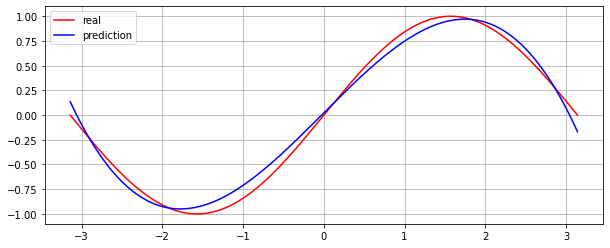

In [23]:
import matplotlib.pyplot as plt

def show(x, y, y_pred):
    fig = plt.figure(figsize=(10, 4))

    plt.plot(x, y, color='red', label="real")
    plt.plot(x, y_pred, color='blue', label="prediction")
    plt.legend()
    plt.grid(True)
    plt.show()

show(x, y, a + b * x + c * x ** 2 + d * x ** 3)

<div class="alert alert-warning">
    <p><b>Q. `grad_y_pred`를 계산하는 수식에서 왜 2를 곱하는 이유는 무엇인가?</b></p>
    <p>👉 (여기에 답을 입력해 주세요)</p>
</div>

<div class="alert alert-warning">
    <p><b>Q. 각 가중치에 대한 gradient를 구하는 식은 어떻게 유도되었는가?</b></p>
    <p>👉 (여기에 답을 입력해 주세요)</p>
</div>

<div class="alert alert-warning">
    <p><b>Q. 다음 함수들의 기능은 무엇인가?</b>
    <a href="https://numpy.org/doc/stable/index.html">hint</a></p>
    <div>👉 numpy.linespace : (여기에 답을 입력해 주세요)<br>
             👉 numpy.sin : (여기에 답을 입력해 주세요)<br>
             👉 numpy.square : (여기에 답을 입력해 주세요)</div>
</div>

#### b. Tensor

NumPy는 훌륭한 프레임워크지만, GPU를 사용하여 수치 연산을 가속화할 수는 없습니다. 현대의 심층 신경망에서 GPU는 종종 [50배 또는 그 이상](https://github.com/jcjohnson/cnn-benchmarks) 의 속도 향상을 제공하기 때문에, 안타깝게도 NumPy는 현대의 딥러닝에는 충분치 않습니다.

이번에는 PyTorch의 가장 핵심적인 개념인 **텐서(Tensor)** 에 대해서 알아보겠습니다. PyTorch 텐서(Tensor)는 개념적으로 NumPy 배열과 동일합니다. 
- 텐서(Tensor)는 n-차원 배열이며, PyTorch는 이러한 텐서들의 연산을 위한 다양한 기능들을 제공합니다.
- NumPy 배열처럼 PyTorch Tensor는 딥러닝이나 연산 그래프, 변화도는 알지 못하며, 과학적 분야의 연산을 위한 포괄적인 도구입니다. 
- 텐서는 연산 그래프와 변화도를 추적할 수도 있지만, 과학적 연산을 위한 일반적인 도구로도 유용합니다.
- 또한 NumPy와는 다르게, PyTorch 텐서는 GPU를 사용하여 수치 연산을 가속할 수 있습니다. PyTorch 텐서를 GPU에서 실행하기 위해서는 단지 적절한 장치를 지정해주기만 하면 됩니다.

위의 NumPy 예제에서와 같이 신경망의 순전파 단계와 역전파 단계구현하되 입력/출력/가중치 값을 PyTorch 텐서를 사용하여 정의해 봅시다. 

✅ 구현해야 하는 사항 : 이전 구현에서 Numpy를 torch.Tensor로 대체한다.

In [24]:
x.shape

(2000,)

------------------ init ------------------
x(2000, <class 'torch.Tensor'>) : tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])
y(2000, <class 'torch.Tensor'>) : tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])
가중치 초기값 : 
  a(<class 'torch.Tensor'>) : -1.2383670806884766
  b(<class 'torch.Tensor'>) : 0.5191817879676819
  c(<class 'torch.Tensor'>) : 0.010196004994213581
  d(<class 'torch.Tensor'>) : 1.1355570554733276
------------------------------------------
[t =  100] loss : 1101.323
[t =  200] loss : 773.745
[t =  300] loss : 544.706
[t =  400] loss : 384.461
[t =  500] loss : 272.275
[t =  600] loss : 193.689
[t =  700] loss : 138.607
[t =  800] loss : 99.979
[t =  900] loss : 72.876
[t = 1000] loss : 53.849
[t = 1100] loss : 40.486
[t = 1200] loss : 31.097
[t = 1300] loss : 24.497
[t = 1400] loss : 19.856
[t = 1500] loss : 16.591
[t = 1600] loss : 14.293
[t = 1700] loss : 12.676
[t = 1800] loss : 11.537
[t = 190

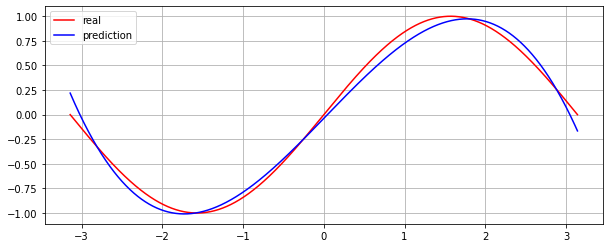

In [25]:
import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

# 무작위로 입력과 출력 데이터를 생성합니다
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 무작위로 가중치를 초기화합니다
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

print(f'------------------ init ------------------')
print(f'x({len(x)}, {x.__class__}) : {x}')
print(f'y({len(y)}, {y.__class__}) : {y}')
print(f'가중치 초기값 : ')
print(f'  a({a.__class__}) : {a}')
print(f'  b({b.__class__}) : {b}')
print(f'  c({c.__class__}) : {c}')
print(f'  d({d.__class__}) : {d}')
print(f'------------------------------------------')

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 예측값 y를 계산합니다
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 손실(loss)을 계산하고 출력합니다
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(f'[t = {t+1:4d}] loss : {loss:.3f}')

    # 손실에 따른 a, b, c, d의 변화도(gradient)를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # 가중치를 갱신합니다.
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'------------------------------------------')
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

show(x, y, a + b * x + c * x ** 2 + d * x ** 3)

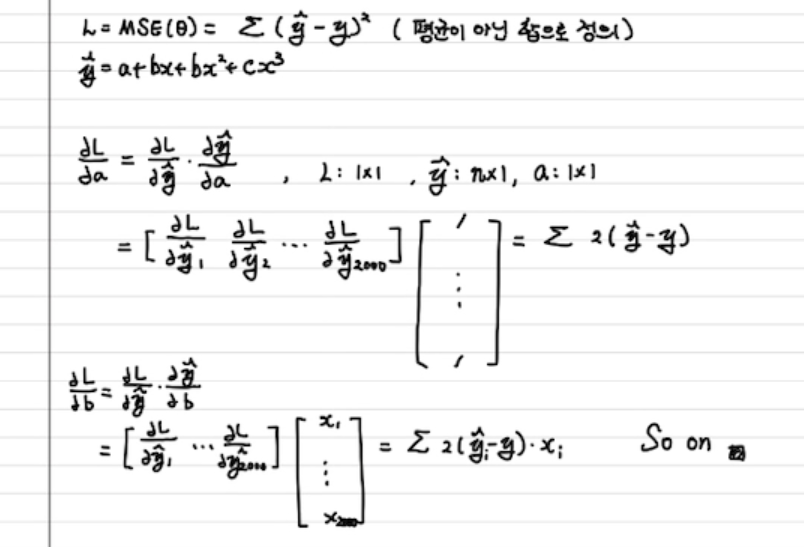

<div class="alert alert-warning">
    <p><b>Q. 파이토치 Tensor가 Numpy에 비하여 가지는 장점이 무엇인가? 위의 문장들을 복사하지 말고 자신만의 표현으로 적어보자.</b></p>
    <p>👉 (여기에 답을 입력해 주세요)</p>
</div>

## 2. Autograd
---

신경망을 학습할 때 가장 자주 사용되는 알고리즘은 **역전파* 입니다. 이 알고리즘에서, 매개변수(모델 가중치)는 주어진 매개변수에 대한 손실 함수의 **변화도(gradient)**에 따라 조정됩니다.

이러한 변화도를 계산하기 위해 PyTorch에는 `torch.autograd`라고 불리는 자동 미분 엔진이 내장되어 있습니다. 이는 모든 계산 그래프에 대한 변화도의 자동 계산을 지원합니다.

입력 `x`, 매개변수 `w` 와 `b` , 그리고 일부 손실 함수가 있는 가장 간단한 단일 계층 신경망을 가정하겠습니다. PyTorch에서는 다음과 같이 정의할 수 있습니다.

In [36]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True) #하나의 데이터에 해당하는 파라미터
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [32]:
x, y, w, b, z, loss

(tensor([1., 1., 1., 1., 1.]),
 tensor([0., 0., 0.]),
 tensor([[-0.0193, -1.6657,  0.1935],
         [-1.4176, -0.3402,  0.7787],
         [-1.0064,  0.4599,  0.8464],
         [-0.4024,  1.4556,  0.1868],
         [ 0.1282,  0.7229,  0.2735]], requires_grad=True),
 tensor([ 0.2427, -1.3167,  0.6033], requires_grad=True),
 tensor([-2.4749, -0.6843,  2.8823], grad_fn=<AddBackward0>),
 tensor(1.1420, grad_fn=<BinaryCrossEntropyWithLogitsBackward>))

### A. Tensor, Function과 연산그래프(Computational graph)

이 코드는 다음의 **연산 그래프** 를 정의합니다:

![](https://i.ibb.co/HFpgNcF/computational-graph.png)

이 신경망에서, ``w`` 와 ``b`` 는 최적화를 해야 하는 **매개변수** 입니다. 따라서
이러한 변수들에 대한 손실 함수의 변화도를 계산할 수 있어야 합니다. 이를 위해서 해당 텐서에
``requires_grad`` 속성을 설정합니다.

<div class="alert alert-info">
    <b>📌NOTE</b>
    <div><b><i>requires_grad</i></b>의 값은 텐서를 생성할 때 설정하거나, 나중에 <b><i>x.requires_grad_(True)</i></b> 메소드를 사용하여 나중에 설정할 수도 있습니다.</div>
</div>

연산 그래프를 구성하기 위해 텐서에 적용하는 함수는 사실 ``Function`` 클래스의 객체입니다. 이 객체는 *순전파* 방향으로 함수를 계산하는 방법과, *역방향 전파* 단계에서 도함수(derivative)를 계산하는 방법을 알고 있습니다. 역방향 전파 함수에 대한 참조(reference)는 텐서의 ``grad_fn`` 속성에 저장됩니다. ``Function`` 에 대한 자세한 정보는 [이 문서](https://pytorch.org/docs/stable/autograd.html#function)에서 찾아볼 수 있습니다.

In [33]:
print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f78bc42ac90>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward object at 0x7f78bc42a9d0>


### B. 변화도(Gradient) 계산하기
신경망에서 매개변수의 가중치를 최적화하려면 매개변수에 대한 손실함수의 도함수(derivative)를 계산해야 합니다. 즉, ``x`` 와 ``y`` 의 일부 고정값에서 $\frac{\partial loss}{\partial w}$와 $\frac{\partial loss}{\partial b}$ 가 필요합니다.

이러한 도함수를 계산하기 위해, ``loss.backward()`` 를 호출한 다음 ``w.grad`` 와
``b.grad`` 에서 값을 가져옵니다:

In [42]:
# loss.backward(retain_graph=True)
print(w.grad)
print(b.grad)
print(z.grad)

tensor([[0.3237, 0.3264, 0.0941],
        [0.3237, 0.3264, 0.0941],
        [0.3237, 0.3264, 0.0941],
        [0.3237, 0.3264, 0.0941],
        [0.3237, 0.3264, 0.0941]])
tensor([0.3237, 0.3264, 0.0941])
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  after removing the cwd from sys.path.


<div class="alert alert-info">
    <b>📌NOTE</b>
    <div>
        <p>• 연산 그래프의 잎(leaf) 노드들 중 <i><b>requires_grad</b></i> 속성이 <i><b>True</b></i> 로 설정된 노드들의 <i><b>grad</b></i> 속성만 구할 수 있습니다. 그래프의 다른 모든 노드에서는 변화도가 유효하지 않습니다.</p>
        <p>• 성능 상의 이유로, 주어진 그래프에서의 <i><b>backward</b></i>를 사용한 변화도 계산은 한 번만 수행할 수 있습니다. 만약 동일한 그래프에서 여러번의 <i><b>backward</b></i> 호출이 필요하면, <i><b>backward</b></i> 호출 시에 <i><b>retrain_graph=True</b></i> 를 전달해야 합니다.</p>
    </div>
</div>

### C. 변화도 추적 멈추기

기본적으로, `requires_grad=True`인 모든 텐서들은 연산 기록을 추적하고 변화도 계산을 지원합니다. 그러나 모델을 학습한 뒤 입력 데이터를 단순히 적용하기만 하는 경우와 같이 순전파 연산만 필요한 경우에는, 이러한 추적이나 지원이 필요없을 수 있습니다. 연산 코드를 `torch.no_grad()` 블록으로 둘러싸서 연산 추적을 멈출 수 있습니다.

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

동일한 결과를 얻는 다른 방법은 텐서에 `detach()` 메소드를 사용하는 것입니다.

변화도 추적을 멈춰야 하는 이유들은 다음과 같습니다:
- 신경망의 일부 매개변수를 고정된 **매개변수(frozen parameter)**로 표시합니다. 이는 [사전 학습된 신경망을 미세조정](https://tutorials.pytorch.kr/beginner/finetuning_torchvision_models_tutorial.html) 할 때 매우 일반적인 시나리오입니다.
- 변화도를 추적하지 않는 텐서의 연산이 더 효율적이기 때문에, 순전파 단계만 수행할 때 **연산 속도가 향상됩니다.**

### D. 연산 그래프에 대한 추가 정보

개념적으로, autograd는 데이터(텐서)의 및 실행된 모든 연산들(및 연산 결과가 새로운 텐서인 경우도 포함하여)의 기록을 [Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function) 객체로
구성된 방향성 비순환 그래프(DAG; Directed Acyclic Graph)에 저장(keep)합니다. 이 방향성 비순환 그래프(DAG)의 잎(leave)은 입력 텐서이고, 뿌리(root)는 결과 텐서입니다. 이 그래프를 뿌리에서부터 잎까지 추적하면 연쇄 법칙(chain rule)에 따라 변화도를 자동으로 계산할 수 있습니다.

순전파 단계에서, `autograd`는 다음 두 가지 작업을 동시에 수행합니다:

- 요청된 연산을 수행하여 결과 텐서를 계산하고,
- DAG에 연산의 *변화도 기능(gradient function)* 를 유지(maintain)합니다.

역전파 단계는 DAG 뿌리(root)에서 ``.backward()`` 가 호출될 때 시작됩니다. ``autograd`` 는 이 때:

- 각 ``.grad_fn`` 으로부터 변화도를 계산하고,
- 각 텐서의 ``.grad`` 속성에 계산 결과를 쌓고(accumulate),
- 연쇄 법칙을 사용하여, 모든 잎(leaf) 텐서들까지 전파(propagate)합니다.

<div class="alert alert-info">
    <b>📌NOTE</b>
    <div>
  <b>PyTorch에서 DAG들은 동적(dynamic)입니다.</b><br>
      주목해야 할 중요한 점은 그래프가 처음부터(from scratch) 다시 생성된다는 것입니다. 매번 <b><i>.bachward()</i></b> 가 호출되고 나면, autograd는 새로운 그래프를 채우기(populate) 시작합니다. 이러한 점 덕분에 모델에서 흐름 제어(control flow) 구문들을 사용할 수 있게 되는 것입니다; 매번 반복(iteration)할 때마다 필요하면 모양(shape)이나 크기(size), 연산(operation)을 바꿀 수 있습니다.
    </div>
</div>

### E. 선택적으로 읽기(Optional Reading): 텐서 변화도와 야코비안 곱(Jacobian Product)

대부분의 경우, 스칼라 손실 함수를 가지고 일부 매개변수와 관련한 변화도를 계산해야 합니다. 그러나 출력 함수가 임의의 텐서인 경우가 있습니다. 이럴 때, PyTorch는 실제 변화도가 아닌 **야코비안 곱(Jacobian product)**\ 을 계산합니다.

$\vec{x}=\langle x_1,\dots,x_n\rangle$ 이고, $\vec{y}=\langle y_1,\dots,y_m\rangle`$ 일 때 벡터 함수 $\vec{y}=f(\vec{x})$에서 $\vec{x}$에 대한 $\vec{y}$의 변화도는 **야코비안 행렬(Jacobian matrix)**로 주어집니다:

$$J=\left(\begin{array}{ccc}
      \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
      \vdots & \ddots & \vdots\\
      \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
      \end{array}\right) $$

야코비안 행렬 자체를 계산하는 대신, PyTorch는 주어진 입력 벡터 $v=(v_1 \dots v_m)$ 에 대한 **야코비안 곱(Jacobian Product)**  $v^T\cdot J$ 을 계산합니다.
이 과정은 $v$ 를 인자로 ``backward`` 를 호출하면 이뤄집니다. $v$의 크기는 곱(product)을 계산하려고 하는 원래 텐서의 크기와 같아야 합니다.

In [ ]:
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nSecond call\n", inp.grad)
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

동일한 인자로 `backward`를 두차례 호출하면 변화도 값이 달라집니다. 이는 역방향 전파를 수행할 때, PyTorch가 **변화도를 누적(accumulate)해두기 때문**입니다. 즉, 계산된 변화도의 값이 연산 그래프의 모든 잎(leaf) 노드의 `grad` 속성에 추가됩니다. 따라서 제대로된 변화도를 계산하기 위해서는 `grad` 속성을 먼저 0으로 만들어야 합니다. 실제 학습 과정에서는 *옵티마이저(optimizer)* 가 이 과정을 도와줍니다.

<div class="alert alert-info">
    <b>📌NOTE</b>
    <div>이전에는 매개변수 없이 <b><i>backward()</i></b> 함수를 호출했습니다. 이는 본질적으로 <b><i>backward(torch.tensor(1.0))</i></b>을 호출하는 것과 동일하며, 신경망 훈련 중의 손실과 같은 스칼라-값 함수의 변화도를 계산하는 유용한 방법입니다.
    </div>
</div>

### F. [실습] Backpropagation with Autograd

앞선 실습에서는 신경망의 순전파 단계와 역전파 단계를 직접 구현해보았습니다. 작은 2계층(2-layer) 신경망에서는 역전파 단계를 직접 구현하는 것이 큰일이 아니지만, 복잡한 대규모 신경망에서는 매우 아슬아슬한 일일 것입니다.

다행히도, [자동 미분](https://en.wikipedia.org/wiki/Automatic_differentiation) 을 사용하여 신경망의 역전파 단계 연산을 자동화할 수 있습니다. PyTorch의 **autograd** 패키지는 정확히 이런 기능을 제공합니다. Autograd를 사용하면, 신경망의 순전파 단계에서 **연산 그래프(computational graph)** 를 정의하게 됩니다; 이 그래프의 노드(node)는 텐서(tensor)이고, 엣지(edge)는 입력 텐서로부터 출력 텐서를 만들어내는 함수가 됩니다. 이 그래프를 통해 역전파를 하게 되면 변화도를 쉽게 계산할 수 있습니다.

이는 복잡하게 들리겠지만, 실제로 사용하는 것은 매우 간단합니다. 각 텐서는 연산그래프에서 노드로 표현됩니다. 만약 x 가 `x.requires_grad=True` 인 텐서라면 `x.grad` 어떤 스칼라 값에 대한 x 의 변화도를 갖는 또 다른 텐서입니다.

이번 단계에서는 텐서 연산을 사용하여 순전파 단계를 계산하고, PyTorch autograd를 사용하여 변화도(gradient)를 계산해보겠습니다.

✅ 구현해야 하는 사항 : 이전 구현에서 역전파 부분을 autograd 기능으로 대체한다.

In [ ]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
# requires_grad=False가 기본값으로 설정되어 역전파 단계 중에 이 텐서들에 대한 변화도를
# 계산할 필요가 없음을 나타냅니다.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 가중치를 갖는 임의의 텐서를 생성합니다. 3차 다항식이므로 4개의 가중치가 필요합니다:
# y = a + b x + c x^2 + d x^3
# requires_grad=True로 설정하여 역전파 단계 중에 이 텐서들에 대한 변화도를 계산할 필요가 
# 있음을 나타냅니다.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

print(f'------------------ init ------------------')
print(f'x({len(x)}) : {x}')
print(f'y({len(y)}) : {y}')
print(f'가중치 초기값 : ')
print(f'  a : {a}')
print(f'  b : {b}')
print(f'  c : {c}')
print(f'  d : {d}')
print(f'------------------------------------------')

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 텐서들 간의 연산을 사용하여 예측값 y를 계산합니다.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 텐서들간의 연산을 사용하여 손실(loss)을 계싼하고 출력합니다.
    # 이 때 손실은 (1,) shape을 갖는 텐서입니다.
    # loss.item() 으로 손실이 갖고 있는 스칼라 값을 가져올 수 있습니다.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(f'[t = {t+1:4d}] loss : {loss:.3f}')

    # autograd 를 사용하여 역전파 단계를 계산합니다. 이는 requires_grad=True를 갖는
    # 모든 텐서들에 대한 손실의 변화도를 계산합니다. 
    # 이후 a.grad와 b.grad, c.grad, d.grad는 각각 a, b, c, d에 대한 손실의 변화도를
    # 갖는 텐서가 됩니다.
    loss.backward()

    # 경사하강법(gradient descent)를 사용하여 가중치를 직접 갱신합니다.
    # torch.no_grad()로 감싸는 이유는, 가중치들이 requires_grad=True 지만
    # autograd에서는 이를 추적하지 않을 것이기 때문입니다.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # 가중치 갱신 후에는 변화도를 직접 0으로 만듭니다.
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'------------------------------------------')
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

with torch.no_grad():
    show(x, y, a + b * x + c * x ** 2 + d * x ** 3)

<div class="alert alert-warning">
    <h4>Q. `loss.backward()`는 어떻게 역전파를 진행하는가?</h4>
    <p>👉 (여기에 답을 입력해 주세요)</p>
</div>

## 3. DATASET과 DATALOADER
---

데이터 샘플을 처리하는 코드는 지저분(messy)하고 유지보수가 어려울 수 있습니다. 더 나은 가독성(readability)과 모듈성(modularity)을 위해 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적입니다. PyTorch는 ``torch.utils.data.DataLoader``와 ``torch.utils.data.Dataset`` 의 두 가지 데이터 기본 요소를 제공하여 미리 준비해된(pre-loaded) 데이터셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도록 합니다.
``Dataset`` 은 샘플과 정답(label)을 저장하고, ``DataLoader`` 는 ``Dataset`` 을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감쌉니다.

PyTorch의 도메인 특화 라이브러리들은 (FashionMNIST와 같은) 다양한 미리 준비해둔(pre-loaded) 데이터셋을 제공합니다. 데이터셋은 ``torch.utils.data.Dataset`` 의 하위 클래스로 개별 데이터를 특정하는 함수가 구현되어 있습니다. 이러한 데이터셋은 모델을 만들어보고(prototype) 성능을 측정(benchmark)하는데 사용할 수 있습니다.

여기에서 데이터셋들을 찾아볼 수 있습니다:
[이미지 데이터셋](https://pytorch.org/vision/stable/datasets.html), 
[텍스트 데이터셋](https://pytorch.org/text/stable/datasets.html) 및
[오디오 데이터셋](https://pytorch.org/audio/stable/datasets.html)

### A. 데이터셋 불러오기

`TorchVision` 에서 [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist) 데이터셋을
불러오는 예제를 살펴보겠습니다. Fashion-MNIST는 Zalando의 기사 이미지 데이터셋으로 60,000개의 학습 예제와 10,000개의 테스트 예제로 이루어져 있습니다. 각 예제는 흑백(grayscale)의 28x28 이미지와 10개 분류(class) 중 하나인 정답(label)으로 구성됩니다.

다음 매개변수들을 사용하여 [FashionMNIST 데이터셋](https://pytorch.org/vision/stable/datasets.html#fashion-mnist)을 불러옵니다:
 - ``root`` 는 학습/테스트 데이터가 저장되는 경로입니다.
 - ``train`` 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.
 - ``download=True`` 는 ``root`` 에 데이터가 없는 경우 인터넷에서 다운로드합니다.
 - ``transform`` 과 ``target_transform`` 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다.

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### B. 데이터셋을 순회하고 시각화하기

Dataset 에 리스트(list)처럼 직접 접근(index)할 수 있습니다: training_data[index]. matplotlib 을 사용하여 학습 데이터의 일부를 시각화해보겠습니다.

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


### C. 파일에서 사용자 정의 데이터셋 만들기

사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 합니다: `__init__`, `__len__`, and `__getitem__`. 아래 구현을 살펴보면 FashionMNIST 이미지들은 img_dir 디렉토리에 저장되고, 정답은 `annotations_file csv` 파일에 별도로 저장됩니다.

다음 장에서 각 함수들에서 일어나는 일들을 자세히 살펴보겠습니다

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

#### a. \_\_init\_\_

`__init__` 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행됩니다. 여기서는 이미지와 주석 파일(annotation_file)이 포함된 디렉토리와 (다음 장에서 자세히 살펴볼) 두가지 변형(transform)을 초기화합니다. 

labels.csv 파일은 다음과 같습니다: 
```
tshirt1.jpg, 0
tshirt2.jpg, 0
......
ankleboot999.jpg, 9
```

In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

#### b. \_\_len\_\_

`__len__` 함수는 데이터셋의 샘플 개수를 반환합니다.

예:

In [ ]:
def __len__(self):
    return len(self.img_labels)

#### c. \_\_getitem\_\_

`__getitem__` 함수는 주어진 인덱스 ``idx`` 에 해당하는 샘플을 데이터셋에서 불러오고 반환합니다.<br>
인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고, ``read_image`` 를 사용하여 이미지를 텐서로 변환하고, ``self.img_labels`` 의 csv 데이터로부터 해당하는 정답(label)을 가져오고, (해당하는 경우) 변형(transform) 함수들을 호출한 뒤, 텐서 이미지와 라벨을 Python 사전(dict)형으로 반환합니다.

In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    sample = {"image": image, "label": label}
    return sample

### D. DataLoader로 학습용 데이터 준비하기

`Dataset`은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다. 모델을 학습할 때, 일반적으로 샘플들을 “미니배치(minibatch)”로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다.

`DataLoader`는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iteratable)입니다.

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

train_dataloader, test_dataloader

### E. DataLoader를 통해 순회하기(iterate)

``DataLoader`` 에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회(iterate)할 수 있습니다.
아래의 각 순회(iteration)는 (각각 ``batch_size=64`` 의 특징(feature)과 정답(label)을 포함하는) ``train_features`` 와
``train_labels`` 의 묶음(batch)을 반환합니다. ``shuffle=True`` 로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞입니다.
(데이터 불러오기 순서를 보다 세밀하게(finer-grained) 제어하려면 [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)
를 살펴보세요.)

In [ ]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## 4. 변형(TRANSFORM)
---

데이터가 항상 머신러닝 알고리즘 학습에 필요한 최종 처리가 된 형태로 제공되지는 않습니다. 변형(transform) 을 해서 데이터를 조작하고 학습에 적합하게 만듭니다.

모든 TorchVision 데이터셋들은 변형 로직을 갖는, 호출 가능한 객체(callable)를 받는 매개변수 두개 ( 특징(feature)을 변경하기 위한 transform 과 정답(label)을 변경하기 위한 target_transform )를 갖습니다 [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) 모듈은 주로 사용하는 몇가지 변형(transform)을 제공합니다.

FashionMNIST 특징(feature)은 PIL Image 형식이며, 정답(label)은 정수(integer)입니다. 학습을 하려면 정규화(normalize)된 텐서 형태의 특징(feature)과 원-핫(one-hot)으로 부호화(encode)된 텐서 형태의 정답(label)이 필요합니다. 이러한 변형(transformation)을 하기 위해 `ToTensor` 와 `Lambda` 를 사용합니다.

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

ds

### A. ToTensor()

`ToTensor`는 PIL Image나 NumPy ndarray 를 FloatTensor 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 [0., 1.] 범위로 비례하여 조정(scale)합니다.

### B. Lambda 변형(Transform)

Lambda 변형은 사용자 정의 람다(lambda) 함수를 적용합니다. 여기에서는 정수를 원-핫으로 부호화된 텐서로 바꾸는 함수를 정의합니다. 이 함수는 먼저 (데이터셋 정답의 개수인) 크기 10짜리 영 텐서(zero tensor)를 만들고, [scatter_](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.scatter_) 를 호출하여 주어진 정답 y 에 해당하는 인덱스에 `value=1` 을 할당합니다.

In [ ]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

### C. ILLUSTRATION OF TRANSFORMS

`torchvision.transforms`을 통해서는 다양한 변환들에 대해여 알아봅시다. 여기서에 등장하지 않는 변환들에서 대해서는 [공식문서](https://pytorch.org/vision/stable/transforms.html)에서 확인해 보실 수 있습니다.

✅ 예시와 함께 주어진 빈칸을 [공식문서](https://pytorch.org/vision/stable/transforms.html)을 참고하여 각 method에 대한 설명으로 채워보세요.

In [ ]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams["figure.figsize"] = (14,6)

img_url = 'https://images.unsplash.com/photo-1597848212624-a19eb35e2651?w=600'
urllib.request.urlretrieve(img_url, "./sunflower.jpg")
orig_img = Image.open('./sunflower.jpg')
plt.imshow(np.asarray(orig_img))

# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

- Pad : `(method의 동작)`

In [ ]:
added_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

- Resize : `(method의 동작)`

In [ ]:
resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_imgs)

- CenterCrop : `(method의 동작)`

In [ ]:
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(center_crops)

- FiveCrop : `(method의 동작)`

In [ ]:
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(100, 100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

- Grayscale : `(method의 동작)`

In [ ]:
gray_img = T.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

#### Random transforms
아래에 method는 랜덤하게 동작하는 변형들 입니다.

- ColorJitter : `(method의 동작)`

In [ ]:
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

- GaussianBlur : `(method의 동작)`

In [ ]:
blurrer = T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

- RandomPerspective : `(method의 동작)`

In [ ]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

- RandomRotation : `(method의 동작)`

In [ ]:
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

- RandomAffine : `(method의 동작)`

In [ ]:
affine_transfomer = T.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs)

- RandomResizedCrop : `(method의 동작)`

In [ ]:
resize_cropper = T.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

- RandomEqualize : `(method의 동작)`

In [ ]:
equalizer = T.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

- AutoAugment : `(method의 동작)`

In [ ]:
policies = [T.AutoAugmentPolicy.CIFAR10, T.AutoAugmentPolicy.IMAGENET, T.AutoAugmentPolicy.SVHN]
augmenters = [T.AutoAugment(policy) for policy in policies]
imgs = [
    [augmenter(orig_img) for _ in range(4)]
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies]
plot(imgs, row_title=row_title)

#### Randomly-applied transforms

일부 변환은 확률 p가 주어지면 무작위로 적용됩니다. 즉, 동일한 변환기 인스턴스로 호출하더라도 변환된 이미지가 실제로 원본 이미지와 같을 수 있습니다!

- RandomHorizontalFlip : `(method의 동작)`



In [ ]:
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

- RandomVerticalFlip : `(method의 동작)`

In [ ]:
vflipper = T.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

- RandomApply : `(method의 동작)`

In [ ]:
applier = T.RandomApply(transforms=[T.RandomCrop(size=(64, 64))], p=0.5)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot(transformed_imgs)

### D. Compose

여러 변환들을 함께 사용하고 싶은 경우 Compose를 이용하여 변환의 파이프라인을 만들 수 있습니다.

In [ ]:
my_transform = T.Compose([
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.5),
    T.RandomRotation(degrees=(0, 180)),
    ToTensor()
 ])

In [ ]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=my_transform,
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

dataloader = DataLoader(ds, batch_size=9, shuffle=True)

In [ ]:
features, labels = next(iter(dataloader))

fig = plt.figure(figsize=(10,10))
i = 1

for img, label in zip(features, labels):
    ax = fig.add_subplot(3, 3, i)
    ax.imshow(img.squeeze(), cmap="gray")
    ax.set_title(label.numpy())
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
    
plt.tight_layout()
plt.show()